### Lab 4 Extension: more exercise about Talib

- Generating Buy and Sell Signals for SMA, MACD, and Bollinger-Bands with Python

#### Step 1: loading all libs

In [5]:
import numpy as np
import pandas as pd
import yfinance as yf #yfinance提供可靠线程和Pythonic方式从Yahoo!下载历史市场数据来提供金融数据。
import pandas_datareader.data as web
import pandas_ta as ta # TA-Lib是一个技术分析库，涵盖了150多种股票、期货交易软件中常用的技术分析指标，如MACD、RSI、KDJ、动量指标、布林带等等，而pandas-ta则是一个基于pandas和ta-lib的高级技术分析工具，具有​​130多个指标和实用功能以及60多个TA-Lib中包含的蜡烛模式。
import matplotlib.pyplot as plt
from datetime import date
plt.style.use('fivethirtyeight')
yf.pdr_override()

#### Step 2: loading data 


In [68]:
stocksymbols = ['SWED-A.ST']
startdate = date(2017,8,4)
end_date = date.today()
print(end_date)
def getMyPortfolio(stocks = stocksymbols ,start = startdate , end = end_date):
    data = web.get_data_yahoo(stocks , data_source='yahoo' , start = start ,end= end )
    return data
data = getMyPortfolio(stocksymbols)
data


2022-10-12
[*********************100%***********************]  1 of 1 completed


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2017-08-04 00:00:00+02:00,212.699997,214.800003,211.399994,214.800003,151.210281,2173918
2017-08-07 00:00:00+02:00,216.000000,216.800003,214.899994,215.500000,151.703064,1961626
2017-08-08 00:00:00+02:00,215.500000,216.199997,214.500000,215.399994,151.632645,1384007
2017-08-09 00:00:00+02:00,214.500000,214.899994,213.000000,214.399994,150.928680,2043332
2017-08-10 00:00:00+02:00,214.500000,214.699997,212.600006,212.899994,149.872757,1896571
...,...,...,...,...,...,...
2022-10-05 00:00:00+02:00,148.399994,148.500000,146.250000,146.949997,146.949997,2303100
2022-10-06 00:00:00+02:00,146.949997,147.500000,144.100006,144.750000,144.750000,2228366
2022-10-07 00:00:00+02:00,144.750000,145.899994,142.850006,143.050003,143.050003,1603962


In [69]:
data.describe()

,Open,High,Low,Close,Adj Close,Volume
count,1304.000000,1304.000000,1304.000000,1304.000000,1304.000000,1.304000e+03
mean,165.266879,166.805238,163.623911,165.209517,140.252106,3.655170e+06
std,29.923617,29.835964,29.978212,29.896827,20.031852,2.342032e+06
min,101.800003,101.959999,99.139999,101.180000,91.705223,0.000000e+00
25%,142.649998,144.005005,140.699997,142.557499,128.959000,2.376514e+06
50%,156.500000,158.029999,155.199997,156.669998,142.180260,3.102306e+06
75%,193.054996,194.712498,191.900005,193.470005,152.909271,4.132682e+06
max,225.300003,226.300003,223.199997,225.199997,191.472610,2.723638e+07


In [72]:
import cufflinks as cf
from matplotlib.pyplot import legend
data1=cf.QuantFig(pineapple,title='SWED Bank is a diver',legend='top')
data1.add_bollinger_bands()
data1.add_volume()
data1.add_ema()
data1.iplot()

#### Step 4: Buy and sell stratgy 
- Strategy based on the moving average 

In [74]:
data['SMA 30'] = ta.sma(data['Close'],30)
data['SMA 100'] = ta.sma(data['Close'],100)
#SMA BUY SELL
#Function for buy and sell signal
def buy_sell(data):
    signalBuy = []
    signalSell = []
    position = False 

    for i in range(len(data)):
        if data['SMA 30'][i] > data['SMA 100'][i]:
            if position == False :
                signalBuy.append(data['Adj Close'][i])
                signalSell.append(np.nan)
                position = True
            else:
                signalBuy.append(np.nan)
                signalSell.append(np.nan)
        elif data['SMA 30'][i] < data['SMA 100'][i]:
            if position == True:
                signalBuy.append(np.nan)
                signalSell.append(data['Adj Close'][i])
                position = False
            else:
                signalBuy.append(np.nan)
                signalSell.append(np.nan)
        else:
            signalBuy.append(np.nan)
            signalSell.append(np.nan)
    return pd.Series([signalBuy, signalSell])
data['Buy_Signal_price'], data['Sell_Signal_price'] = buy_sell(data)
data

,Open,High,Low,Close,Adj Close,Volume,SMA 30,SMA 100,Buy_Signal_price,Sell_Signal_price
Date,,,,,,,,,,
2017-08-04 00:00:00+02:00,212.699997,214.800003,211.399994,214.800003,151.210281,2173918,NaN,NaN,NaN,NaN
2017-08-07 00:00:00+02:00,216.000000,216.800003,214.899994,215.500000,151.703064,1961626,NaN,NaN,NaN,NaN
2017-08-08 00:00:00+02:00,215.500000,216.199997,214.500000,215.399994,151.632645,1384007,NaN,NaN,NaN,NaN
2017-08-09 00:00:00+02:00,214.500000,214.899994,213.000000,214.399994,150.928680,2043332,NaN,NaN,NaN,NaN
2017-08-10 00:00:00+02:00,214.500000,214.699997,212.600006,212.899994,149.872757,1896571,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...
2022-10-05 00:00:00+02:00,148.399994,148.500000,146.250000,146.949997,146.949997,2303100,145.165000,141.767500,NaN,NaN
2022-10-06 00:00:00+02:00,146.949997,147.500000,144.100006,144.750000,144.750000,2228366,145.390000,141.696001,NaN,NaN
2022-10-07 00:00:00+02:00,144.750000,145.899994,142.850006,143.050003,143.050003,1603962,145.633333,141.620001,NaN,NaN


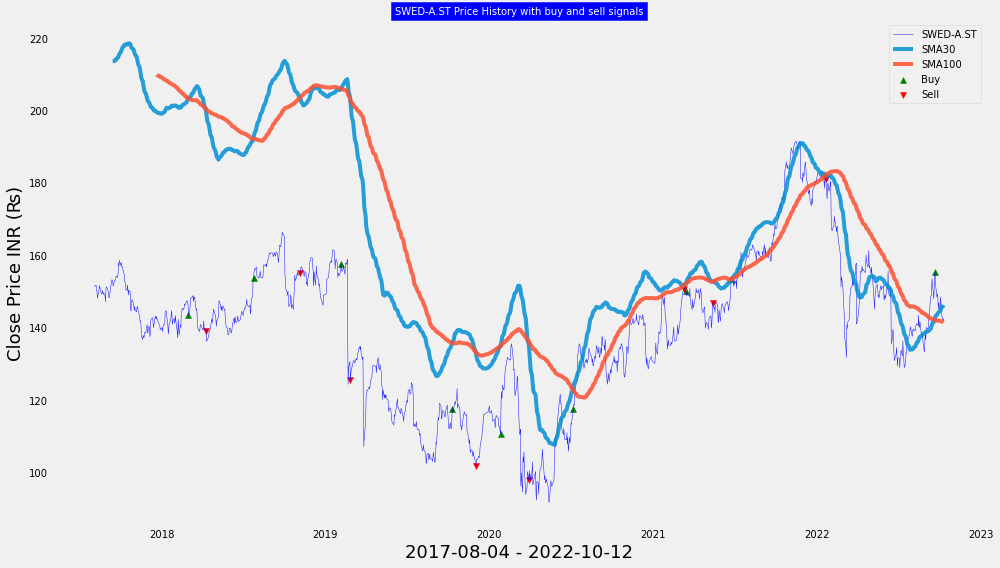

In [75]:
fig, ax = plt.subplots(figsize=(14,8))
ax.plot(data['Adj Close'] , label = stocksymbols[0] ,linewidth=0.5, color='blue', alpha = 0.9)
ax.plot(data['SMA 30'], label = 'SMA30', alpha = 0.85)
ax.plot(data['SMA 100'], label = 'SMA100' , alpha = 0.85)
ax.scatter(data.index , data['Buy_Signal_price'] , label = 'Buy' , marker = '^', color = 'green',alpha =1 )
ax.scatter(data.index , data['Sell_Signal_price'] , label = 'Sell' , marker = 'v', color = 'red',alpha =1 )
ax.set_title(stocksymbols[0] + " Price History with buy and sell signals",fontsize=10, backgroundcolor='blue', color='white')
ax.set_xlabel(f'{startdate} - {end_date}' ,fontsize=18)
ax.set_ylabel('Close Price INR (₨)' , fontsize=18)
legend = ax.legend()
ax.grid()
plt.tight_layout()
plt.show()

#### Step 5: buy and sell based on MACD
- The Moving Average Convergence Divergence indicator (MACD) is calculated using two exponential moving averages (EMA) - short term and long term. 
   - An exponential moving average of MACD is used as a signal line to indicate the upward or downward momentum. An exponential moving average is nothing but simply a moving average that gives more weightage to the recent data.
- Calculate the MACD with pandas-ta; it'll give us three columns, one is of the difference between the two EMA's called MACD and one is the EMA of MACD value called as Signal, and the last one is the difference between MACD & Signal called as MACD histogram.

In [76]:
macd = ta.macd(data['Close'])
macd

,MACD_12_26_9,MACDh_12_26_9,MACDs_12_26_9
Date,,,
2017-08-04 00:00:00+02:00,NaN,NaN,NaN
2017-08-07 00:00:00+02:00,NaN,NaN,NaN
2017-08-08 00:00:00+02:00,NaN,NaN,NaN
2017-08-09 00:00:00+02:00,NaN,NaN,NaN
2017-08-10 00:00:00+02:00,NaN,NaN,NaN
...,...,...,...
2022-10-05 00:00:00+02:00,1.316966,-0.805516,2.122483
2022-10-06 00:00:00+02:00,0.979077,-0.914724,1.893802
2022-10-07 00:00:00+02:00,0.567580,-1.060978,1.628557


In [77]:
data= pd.concat([data, macd], axis=1).reindex(data.index)
data



,Open,High,Low,Close,Adj Close,Volume,SMA 30,SMA 100,Buy_Signal_price,Sell_Signal_price,MACD_12_26_9,MACDh_12_26_9,MACDs_12_26_9
Date,,,,,,,,,,,,,
2017-08-04 00:00:00+02:00,212.699997,214.800003,211.399994,214.800003,151.210281,2173918,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2017-08-07 00:00:00+02:00,216.000000,216.800003,214.899994,215.500000,151.703064,1961626,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2017-08-08 00:00:00+02:00,215.500000,216.199997,214.500000,215.399994,151.632645,1384007,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2017-08-09 00:00:00+02:00,214.500000,214.899994,213.000000,214.399994,150.928680,2043332,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2017-08-10 00:00:00+02:00,214.500000,214.699997,212.600006,212.899994,149.872757,1896571,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2022-10-05 00:00:00+02:00,148.399994,148.500000,146.250000,146.949997,146.949997,2303100,145.165000,141.767500,NaN,NaN,1.316966,-0.805516,2.122483
2022-10-06 00:00:00+02:00,146.949997,147.500000,144.100006,144.750000,144.750000,2228366,145.390000,141.696001,NaN,NaN,0.979077,-0.914724,1.893802
2022-10-07 00:00:00+02:00,144.750000,145.899994,142.850006,143.050003,143.050003,1603962,145.633333,141.620001,NaN,NaN,0.567580,-1.060978,1.628557


In [78]:

def MACD_Strategy(df, risk):
    MACD_Buy=[]
    MACD_Sell=[]
    position=False

    for i in range(0, len(df)):
        if df['MACD_12_26_9'][i] > df['MACDs_12_26_9'][i] :
            MACD_Sell.append(np.nan)
            if position ==False:
                MACD_Buy.append(df['Adj Close'][i])
                position=True
            else:
                MACD_Buy.append(np.nan)
        elif df['MACD_12_26_9'][i] < df['MACDs_12_26_9'][i] :
            MACD_Buy.append(np.nan)
            if position == True:
                MACD_Sell.append(df['Adj Close'][i])
                position=False
            else:
                MACD_Sell.append(np.nan)
        elif position == True and df['Adj Close'][i] < MACD_Buy[-1] * (1 - risk):
            MACD_Sell.append(df["Adj Close"][i])
            MACD_Buy.append(np.nan)
            position = False
        elif position == True and df['Adj Close'][i] < df['Adj Close'][i - 1] * (1 - risk):
            MACD_Sell.append(df["Adj Close"][i])
            MACD_Buy.append(np.nan)
            position = False
        else:
            MACD_Buy.append(np.nan)
            MACD_Sell.append(np.nan)

    data['MACD_Buy_Signal_price'] = MACD_Buy
    data['MACD_Sell_Signal_price'] = MACD_Sell


In [79]:
MACD_strategy = MACD_Strategy(data, 0.025)
MACD_strategy

In [80]:
def MACD_color(data):
    MACD_color = []
    for i in range(0, len(data)):
        if data['MACDh_12_26_9'][i] > data['MACDh_12_26_9'][i - 1]:
            MACD_color.append(True)
        else:
            MACD_color.append(False)
    return MACD_color

data['positive'] = MACD_color(data)
data

,Open,High,Low,Close,Adj Close,Volume,SMA 30,SMA 100,Buy_Signal_price,Sell_Signal_price,MACD_12_26_9,MACDh_12_26_9,MACDs_12_26_9,MACD_Buy_Signal_price,MACD_Sell_Signal_price,positive
Date,,,,,,,,,,,,,,,,
2017-08-04 00:00:00+02:00,212.699997,214.800003,211.399994,214.800003,151.210281,2173918,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,False
2017-08-07 00:00:00+02:00,216.000000,216.800003,214.899994,215.500000,151.703064,1961626,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,False
2017-08-08 00:00:00+02:00,215.500000,216.199997,214.500000,215.399994,151.632645,1384007,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,False
2017-08-09 00:00:00+02:00,214.500000,214.899994,213.000000,214.399994,150.928680,2043332,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,False
2017-08-10 00:00:00+02:00,214.500000,214.699997,212.600006,212.899994,149.872757,1896571,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2022-10-05 00:00:00+02:00,148.399994,148.500000,146.250000,146.949997,146.949997,2303100,145.165000,141.767500,NaN,NaN,1.316966,-0.805516,2.122483,NaN,NaN,True
2022-10-06 00:00:00+02:00,146.949997,147.500000,144.100006,144.750000,144.750000,2228366,145.390000,141.696001,NaN,NaN,0.979077,-0.914724,1.893802,NaN,NaN,False
2022-10-07 00:00:00+02:00,144.750000,145.899994,142.850006,143.050003,143.050003,1603962,145.633333,141.620001,NaN,NaN,0.567580,-1.060978,1.628557,NaN,NaN,False


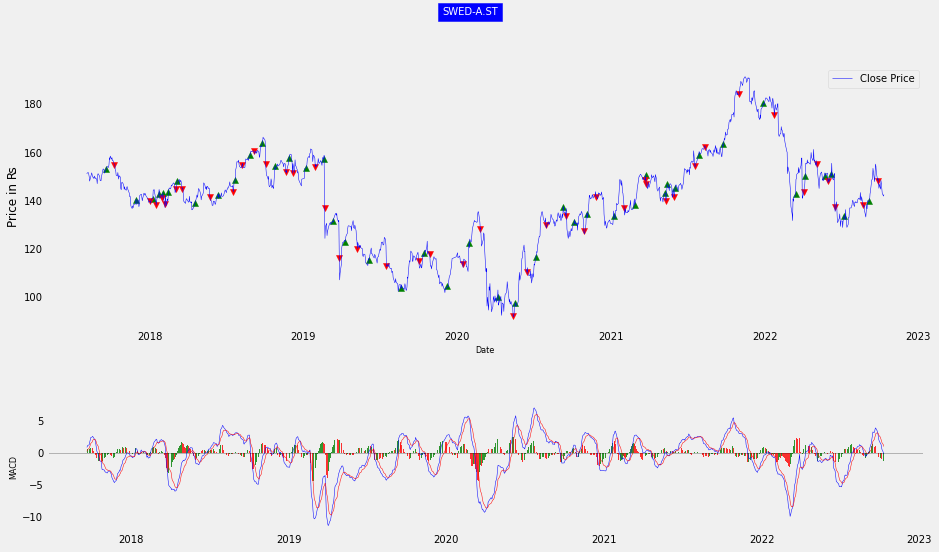

In [85]:
plt.rcParams.update({'font.size': 10})
fig, ax1 = plt.subplots(figsize=(14,8))
fig.suptitle(stocksymbols[0], fontsize=10, backgroundcolor='blue', color='white')
ax1 = plt.subplot2grid((14, 8), (0, 0), rowspan=8, colspan=14)
ax2 = plt.subplot2grid((14, 12), (10, 0), rowspan=6, colspan=14)
ax1.set_ylabel('Price in ₨')
ax1.plot('Adj Close',data=data, label='Close Price', linewidth=0.5, color='blue')
ax1.scatter(data.index, data['MACD_Buy_Signal_price'], color='green', marker='^', alpha=1)
ax1.scatter(data.index, data['MACD_Sell_Signal_price'], color='red', marker='v', alpha=1)
ax1.legend()
ax1.grid()
ax1.set_xlabel('Date', fontsize=8)

ax2.set_ylabel('MACD', fontsize=8)
ax2.plot('MACD_12_26_9', data=data, label='MACD', linewidth=0.5, color='blue')
ax2.plot('MACDs_12_26_9', data=data, label='signal', linewidth=0.5, color='red')
ax2.bar(data.index,'MACDh_12_26_9', data=data, label='Volume', color=data.positive.map({True: 'g', False: 'r'}),width=1,alpha=0.8)
ax2.axhline(0, color='black', linewidth=0.5, alpha=0.5)
ax2.grid()
plt.show()

----
#### Step 6: Bollingband buy and sell strategy 
- Upper Bollinger band, Middle Bollinger band, Lower Bollinger band. 
 - The upper and lower Bollinger bands are plotted two standard deviations away from the mean average of the Close Price. 
 - The two bands comprise more than 80% of the price action, thus making any price above or below the bands highly significant.

In [86]:
def bb_strategy(data):
    bbBuy = []
    bbSell = []
    position = False
    bb = ta.bbands(data['Adj Close'], length=20,std=2)
    data = pd.concat([data, bb], axis=1).reindex(data.index)

    for i in range(len(data)):
        if data['Adj Close'][i] < data['BBL_20_2.0'][i]:
            if position == False :
                bbBuy.append(data['Adj Close'][i])
                bbSell.append(np.nan)
                position = True
            else:
                bbBuy.append(np.nan)
                bbSell.append(np.nan)
        elif data['Adj Close'][i] > data['BBU_20_2.0'][i]:
            if position == True:
                bbBuy.append(np.nan)
                bbSell.append(data['Adj Close'][i])
                position = False #To indicate that I actually went there
            else:
                bbBuy.append(np.nan)
                bbSell.append(np.nan)
        else :
            bbBuy.append(np.nan)
            bbSell.append(np.nan)

    data['bb_Buy_Signal_price'] = bbBuy
    data['bb_Sell_Signal_price'] = bbSell

    return data

#storing the function
data = bb_strategy(data)
data

KeyError: 0

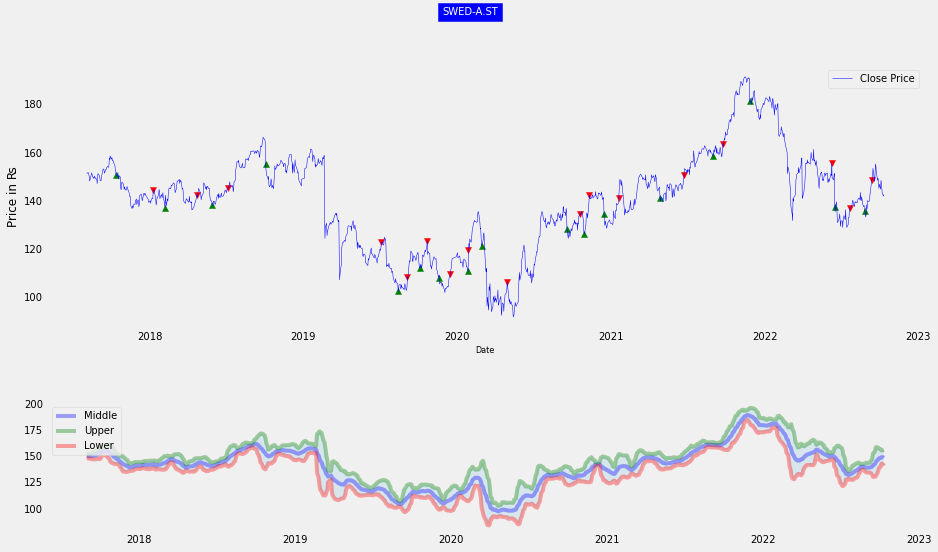

In [87]:
#plot
fig, ax1 = plt.subplots(figsize=(14,8))
fig.suptitle(stocksymbols[0], fontsize=10, backgroundcolor='blue', color='white')
ax1 = plt.subplot2grid((14, 8), (0, 0), rowspan=8, colspan=14)
ax2 = plt.subplot2grid((14, 12), (10, 0), rowspan=6, colspan=14)
ax1.set_ylabel('Price in ₨')
ax1.plot(data['Adj Close'],label='Close Price', linewidth=0.5, color='blue')
ax1.scatter(data.index, data['bb_Buy_Signal_price'], color='green', marker='^', alpha=1)
ax1.scatter(data.index, data['bb_Sell_Signal_price'], color='red', marker='v', alpha=1)
ax1.legend()
ax1.grid()
ax1.set_xlabel('Date', fontsize=8)

ax2.plot(data['BBM_20_2.0'], label='Middle', color='blue', alpha=0.35) #middle band
ax2.plot(data['BBU_20_2.0'], label='Upper', color='green', alpha=0.35) #Upper band
ax2.plot(data['BBL_20_2.0'], label='Lower', color='red', alpha=0.35) #lower band
ax2.fill_between(data.index, data['BBL_20_2.0'], data['BBU_20_2.0'], alpha=0.1)
ax2.legend(loc='upper left')
ax2.grid()
plt.show()